## Volume Price Trend

Volume Price Trend (VPT)는 거래량과 가격 변동을 함께 고려하는 기술적 분석 도구로, 주식이나 다른 자산의 가격 변동에 대한 거래량의 영향을 측정하는 데 사용된다. VPT는 주로 추세의 강도와 방향을 확인하고, 잠재적인 반전 신호를 감지하는 데 도움을 줄 수 있다.

Volume Price Trend의 계산 방법은 다음과 같다

1. 먼저, 각 거래일에 대한 가격 변동 비율을 계산한다

$$r_t = \frac{C_t - C_{t-1}}{C_{t-1}}$$

2. 이 가격 변동 비율에 당일 거래량을 곱한다

$$\mbox{VWR}_t = r_t \times V_t$$

여기서 VWR은 volume weighted return rate이다

3. 마지막으로, 이 값들을 누적하여 VPT를 계산한다

$$\mathrm{VPT}_t = \mathrm{VPT}_{t-1} + \mbox{VWR}_t$$

이렇게 계산된 Volume Price Trend는 가격 변동이 거래량의 지지 또는 저항을 받으며 이루어지는지를 나타낸다. VPT가 상승하면, 가격 상승이 거래량에 의해 지지받고 있음을 나타내며, 이는 추세가 강화될 가능성을 시사한다. 반대로 VPT가 하락하면, 가격 하락이 거래량에 의해 지지받고 있음을 나타내며, 이는 추세가 약화될 가능성을 시사한다.

VPT는 다른 지표와 함께 사용될 때 특히 유용하며, 가격 움직임에 대한 거래량의 확인으로써 중요한 거래 결정을 내리는 데 도움을 줄 수 있다. VPT의 주요 기능은 가격 변동과 거래량 사이의 관계를 명확하게 하고, 시장의 강세 또는 약세 신호를 제공하는 것이다.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ta.volume import volume_price_trend
import yfinance as yf

import warnings
warnings.filterwarnings('ignore')

start_date = '2023-01-01'
end_date = '2024-04-14'
ticker = '^GSPC'
data = yf.download(ticker, start = start_date, end = end_date)

[*********************100%%**********************]  1 of 1 completed


In [2]:
vpt = volume_price_trend(
    close = data['Close'],
    volume = data['Volume'],
    fillna = False
)

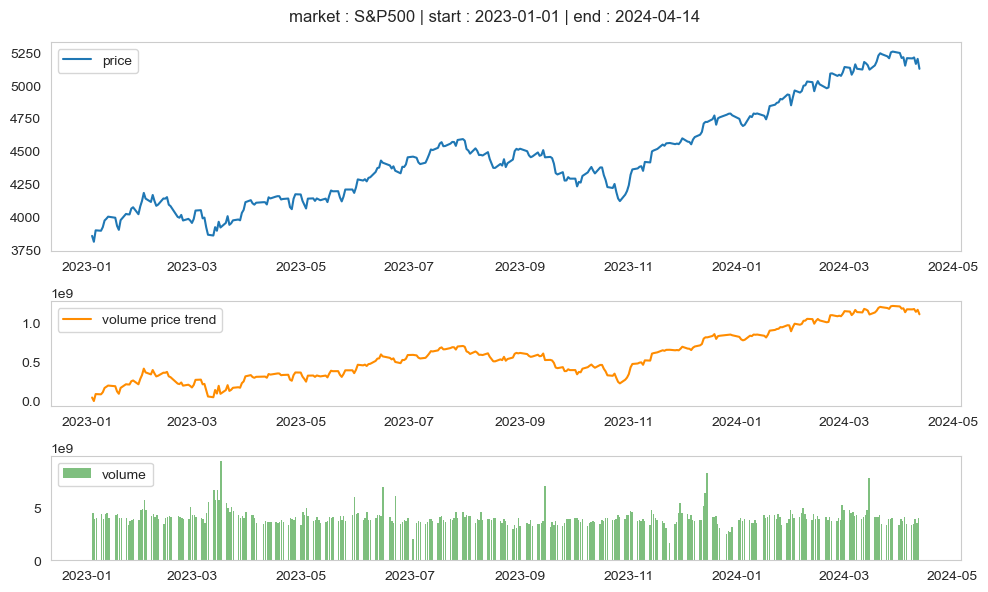

In [6]:
import matplotlib.gridspec as gridspec

plt.figure(figsize = (10, 6))
plt.subplot(3, 1, 1)
gs = gridspec.GridSpec(3, 1, height_ratios=[2, 1, 1]) 

plt.subplot(gs[0])
plt.plot(data['Close'][1:])
plt.grid(False)
plt.legend(['price'])

plt.subplot(gs[1])
plt.plot(vpt, color = 'darkorange')
plt.grid(False)
plt.legend(['volume price trend'])

plt.subplot(gs[2])
plt.bar(data['Volume'][1:].index, data['Volume'][1:], color = 'green', edgecolor = 'none', alpha = 0.5)
plt.grid(False)
plt.legend(['volume'])

plt.suptitle(f'market : S&P500 | start : {start_date} | end : {end_date}')
plt.tight_layout()
plt.show()